In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *
from plotting_report import *

import warnings
warnings.filterwarnings("ignore")

/data/nasif12/home_if12/l_mai/.conda/envs/mm_scgenetics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# da
# plt.figure(figsize=(8, 4))
# sns.boxplot(data=cell_counts, x='cell_label', y='cell_count', palette='viridis')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Cell Type')
# plt.ylabel('Number of Cells')
# plt.title('Number of Cells per Sample for Each Cell Type')
# plt.tight_layout()

# Show the plot
plt.show()

## this notebook is used to compare performance of burden types

In [2]:
df_to_plot = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_summary.csv")

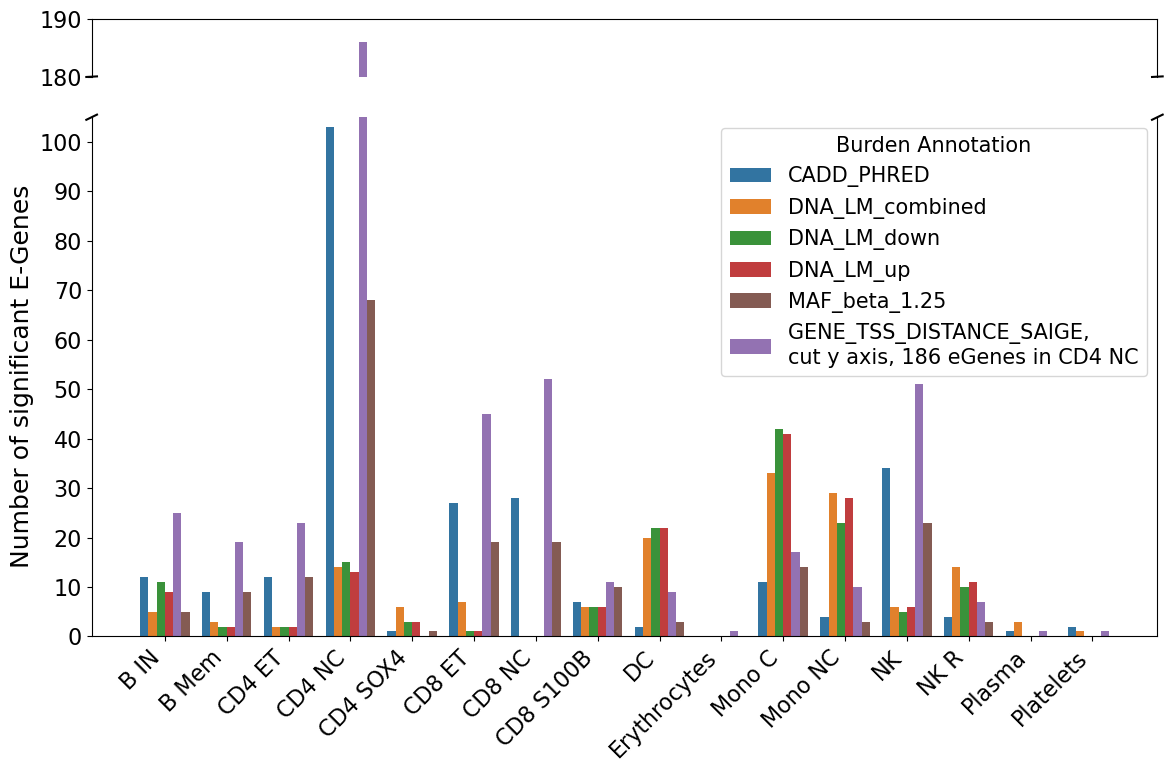

In [3]:
plot_egenes_with_broken_axis(df_to_plot)

In [16]:
df_final_FDR = pd.read_csv('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_FDR_corrected.csv') 
df_final_FDR

burden_gene      target_gene              burden_type    pvalue  \
0       ENSG00000228463  ENSG00000228463               CADD_PHRED  0.393581   
1       ENSG00000228327  ENSG00000228327               CADD_PHRED  0.348254   
2       ENSG00000237491  ENSG00000237491               CADD_PHRED  0.617412   
3       ENSG00000225880  ENSG00000225880               CADD_PHRED  0.924011   
4       ENSG00000230368  ENSG00000230368               CADD_PHRED  0.532657   
...                 ...              ...                      ...       ...   
886957  ENSG00000100138  ENSG00000100138  GENE_TSS_DISTANCE_SAIGE  0.748266   
886958  ENSG00000183172  ENSG00000183172  GENE_TSS_DISTANCE_SAIGE  0.162003   
886959  ENSG00000184983  ENSG00000184983  GENE_TSS_DISTANCE_SAIGE  0.893728   
886960  ENSG00000100300  ENSG00000100300  GENE_TSS_DISTANCE_SAIGE  0.376597   
886961  ENSG00000170638  ENSG00000170638  GENE_TSS_DISTANCE_SAIGE  0.127100   

            beta     cell_type  chromosome  significant  FDR_corrected  \
0      -0.004054        CD8 ET           1        False       0.955526   
1      -0.002507        CD8 ET           1        False       0.947938   
2      -0.001265        CD8 ET           1        False       0.979683   
3      -0.000300        CD8 ET           1        False       0.997450   
4       0.002424        CD8 ET           1        False       0.970296   
...          ...           ...         ...          ...            ...   
886957  0.087600  Erythrocytes          22        False       0.979290   
886958  0.232128  Erythrocytes          22        False       0.979290   
886959  0.034688  Erythrocytes          22        False       0.979290   
886960  0.222862  Erythrocytes          22        False       0.979290   
886961  0.397016  Erythrocytes          22        False       0.979290   

                         celltype-annotation  
0                          CD8 ET-CADD_PHRED  
1                          CD8 ET-CADD_PHRED  
2                          CD8 ET-CADD_PHRED  
3                          CD8 ET-CADD_PHRED  
4                          CD8 ET-CADD_PHRED  
...                                      ...  
886957  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
886958  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
886959  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
886960  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
886961  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  

[886962 rows x 10 columns]

## QQ plots

In [5]:
p1=QQ_plot_sig_egenes(df_final_FDR, "CADD_PHRED")
p2=QQ_plot_sig_egenes(df_final_FDR, "GENE_TSS_DISTANCE_SAIGE")
p3=QQ_plot_sig_egenes(df_final_FDR, "MAF_beta_1.25")
p4=QQ_plot_sig_egenes(df_final_FDR, "DNA_LM_combined")
p5=QQ_plot_sig_egenes(df_final_FDR, "DNA_LM_up")
p6=QQ_plot_sig_egenes(df_final_FDR, "DNA_LM_down")

[2025-02-04 16:38:27,569] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:38:31,834] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:38:36,409] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:38:40,721] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


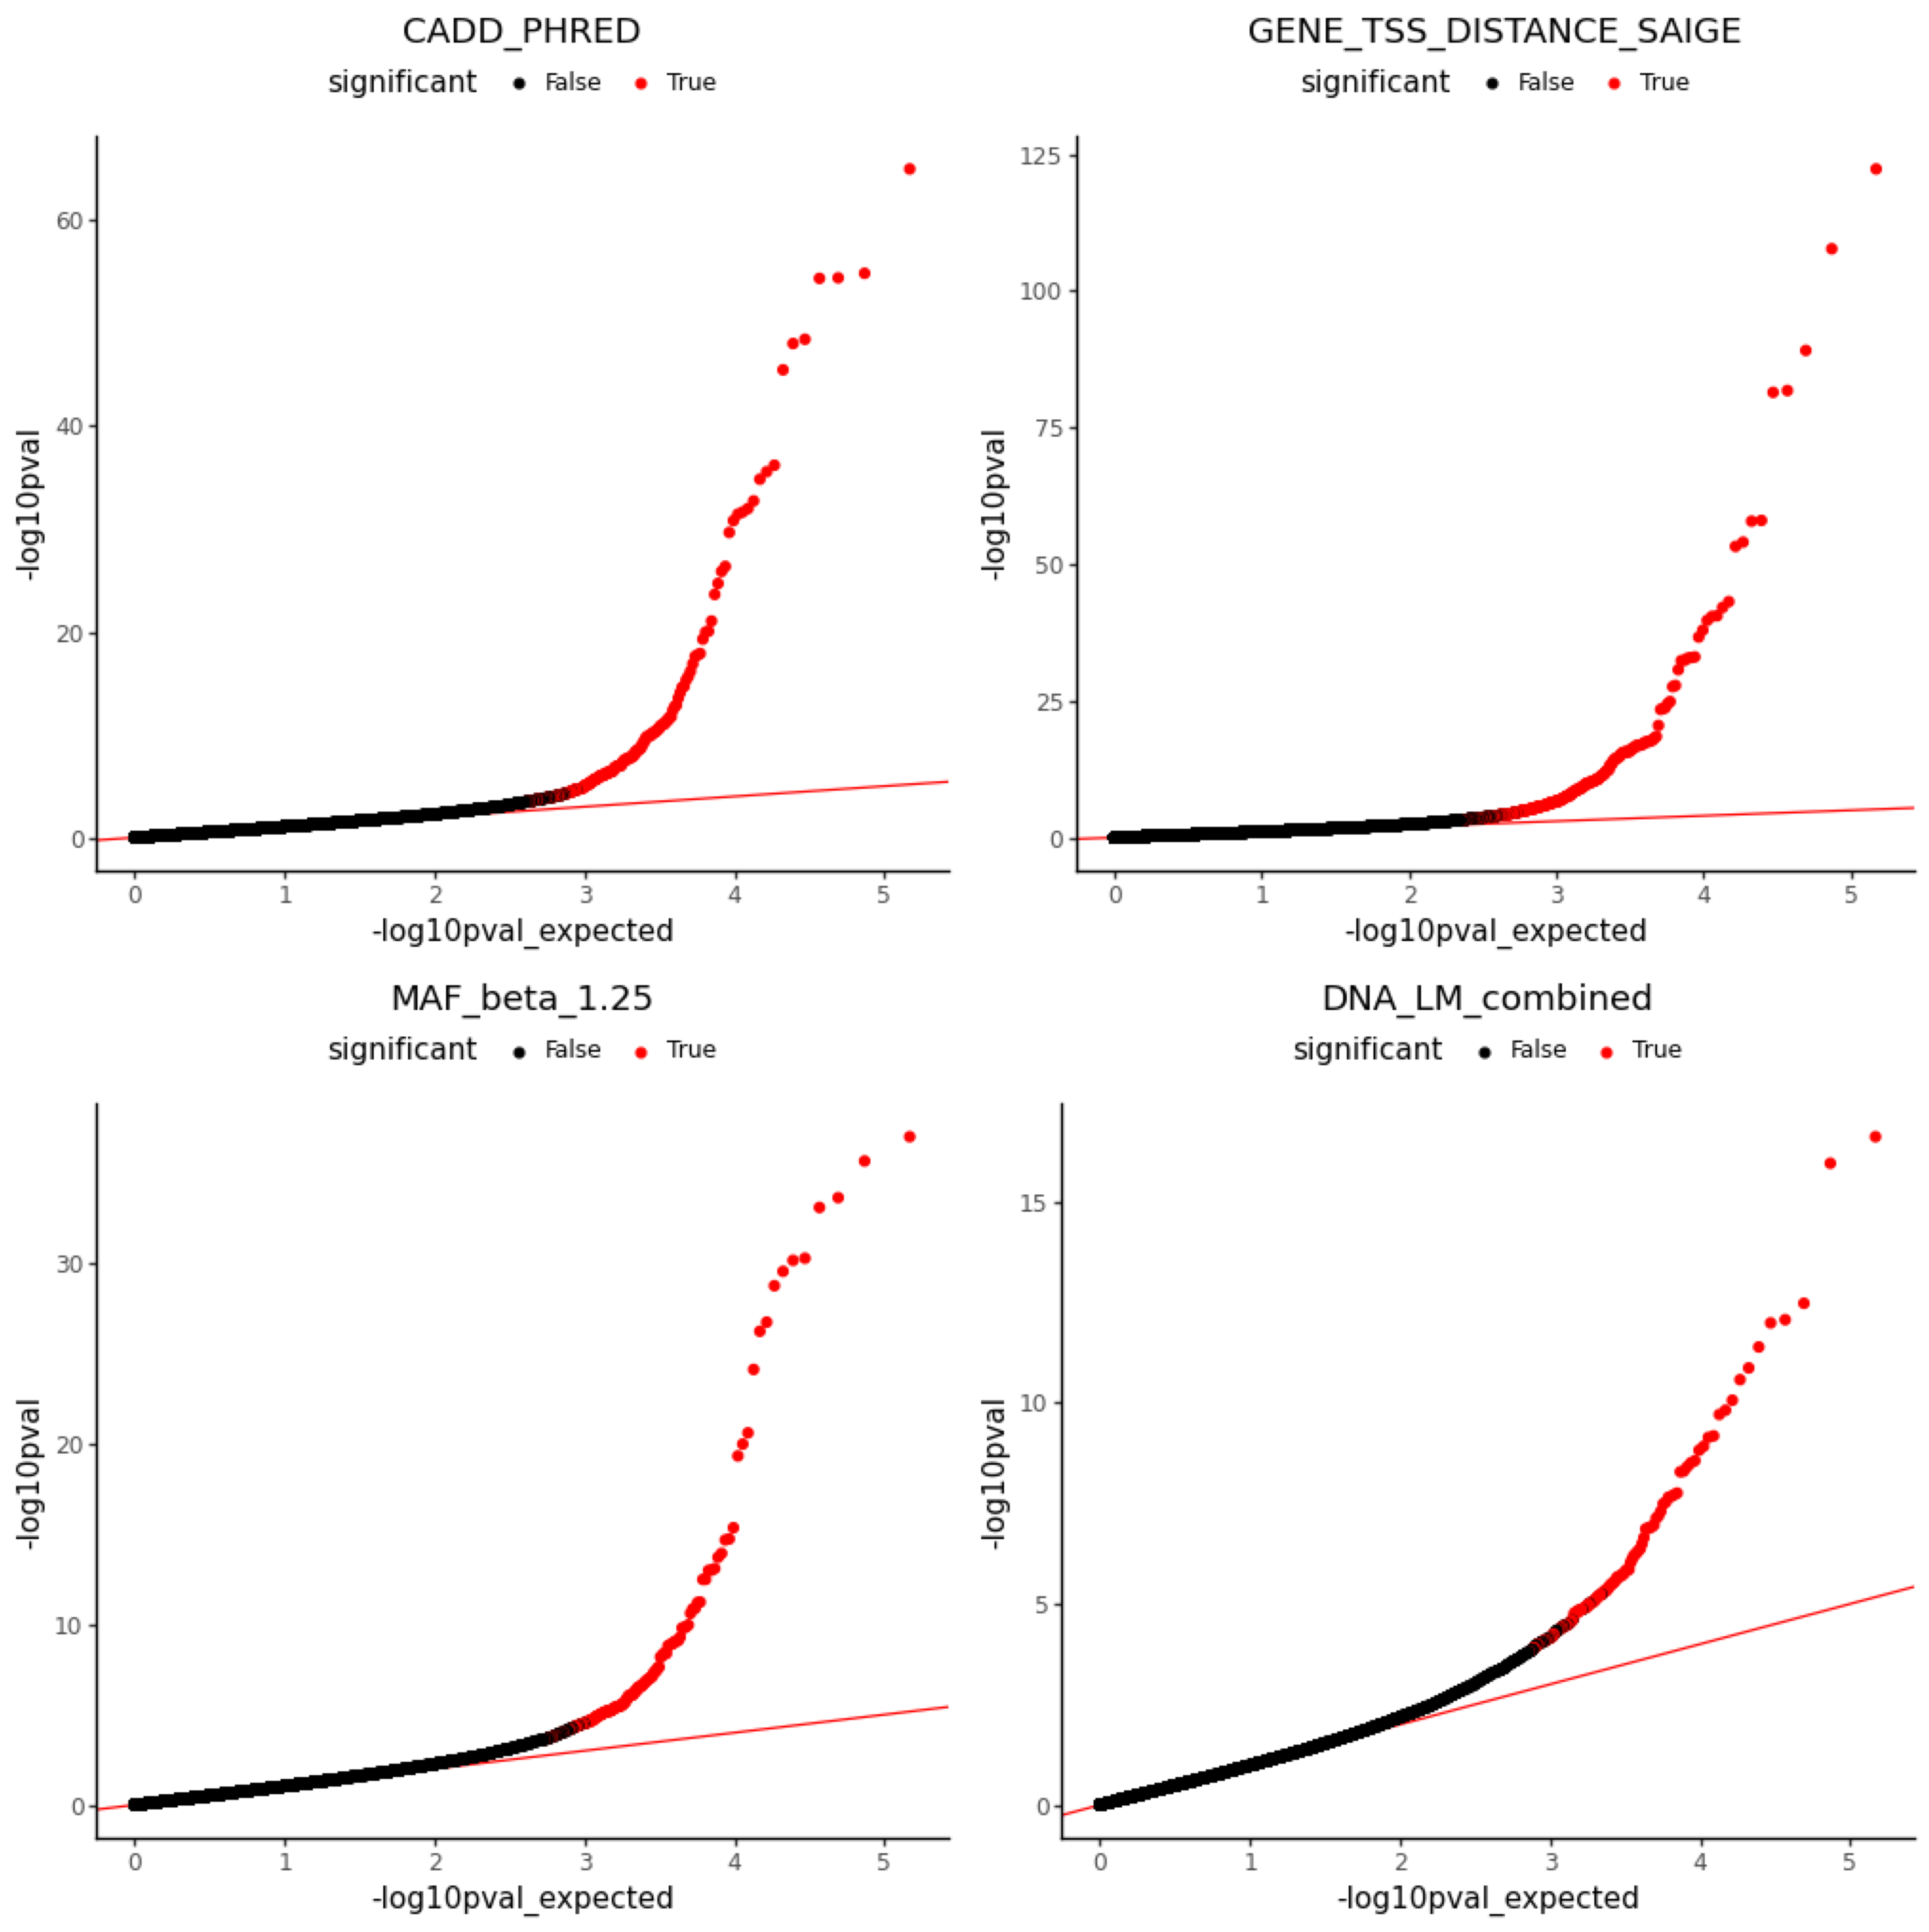

In [6]:
plotnine_grid2([p1,p2, p3, p4], row=2, col=2, figsize=(30, 30))

[2025-02-04 16:40:07,634] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:40:11,947] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:40:16,215] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:40:20,429] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:40:25,051] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[2025-02-04 16:40:29,560] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


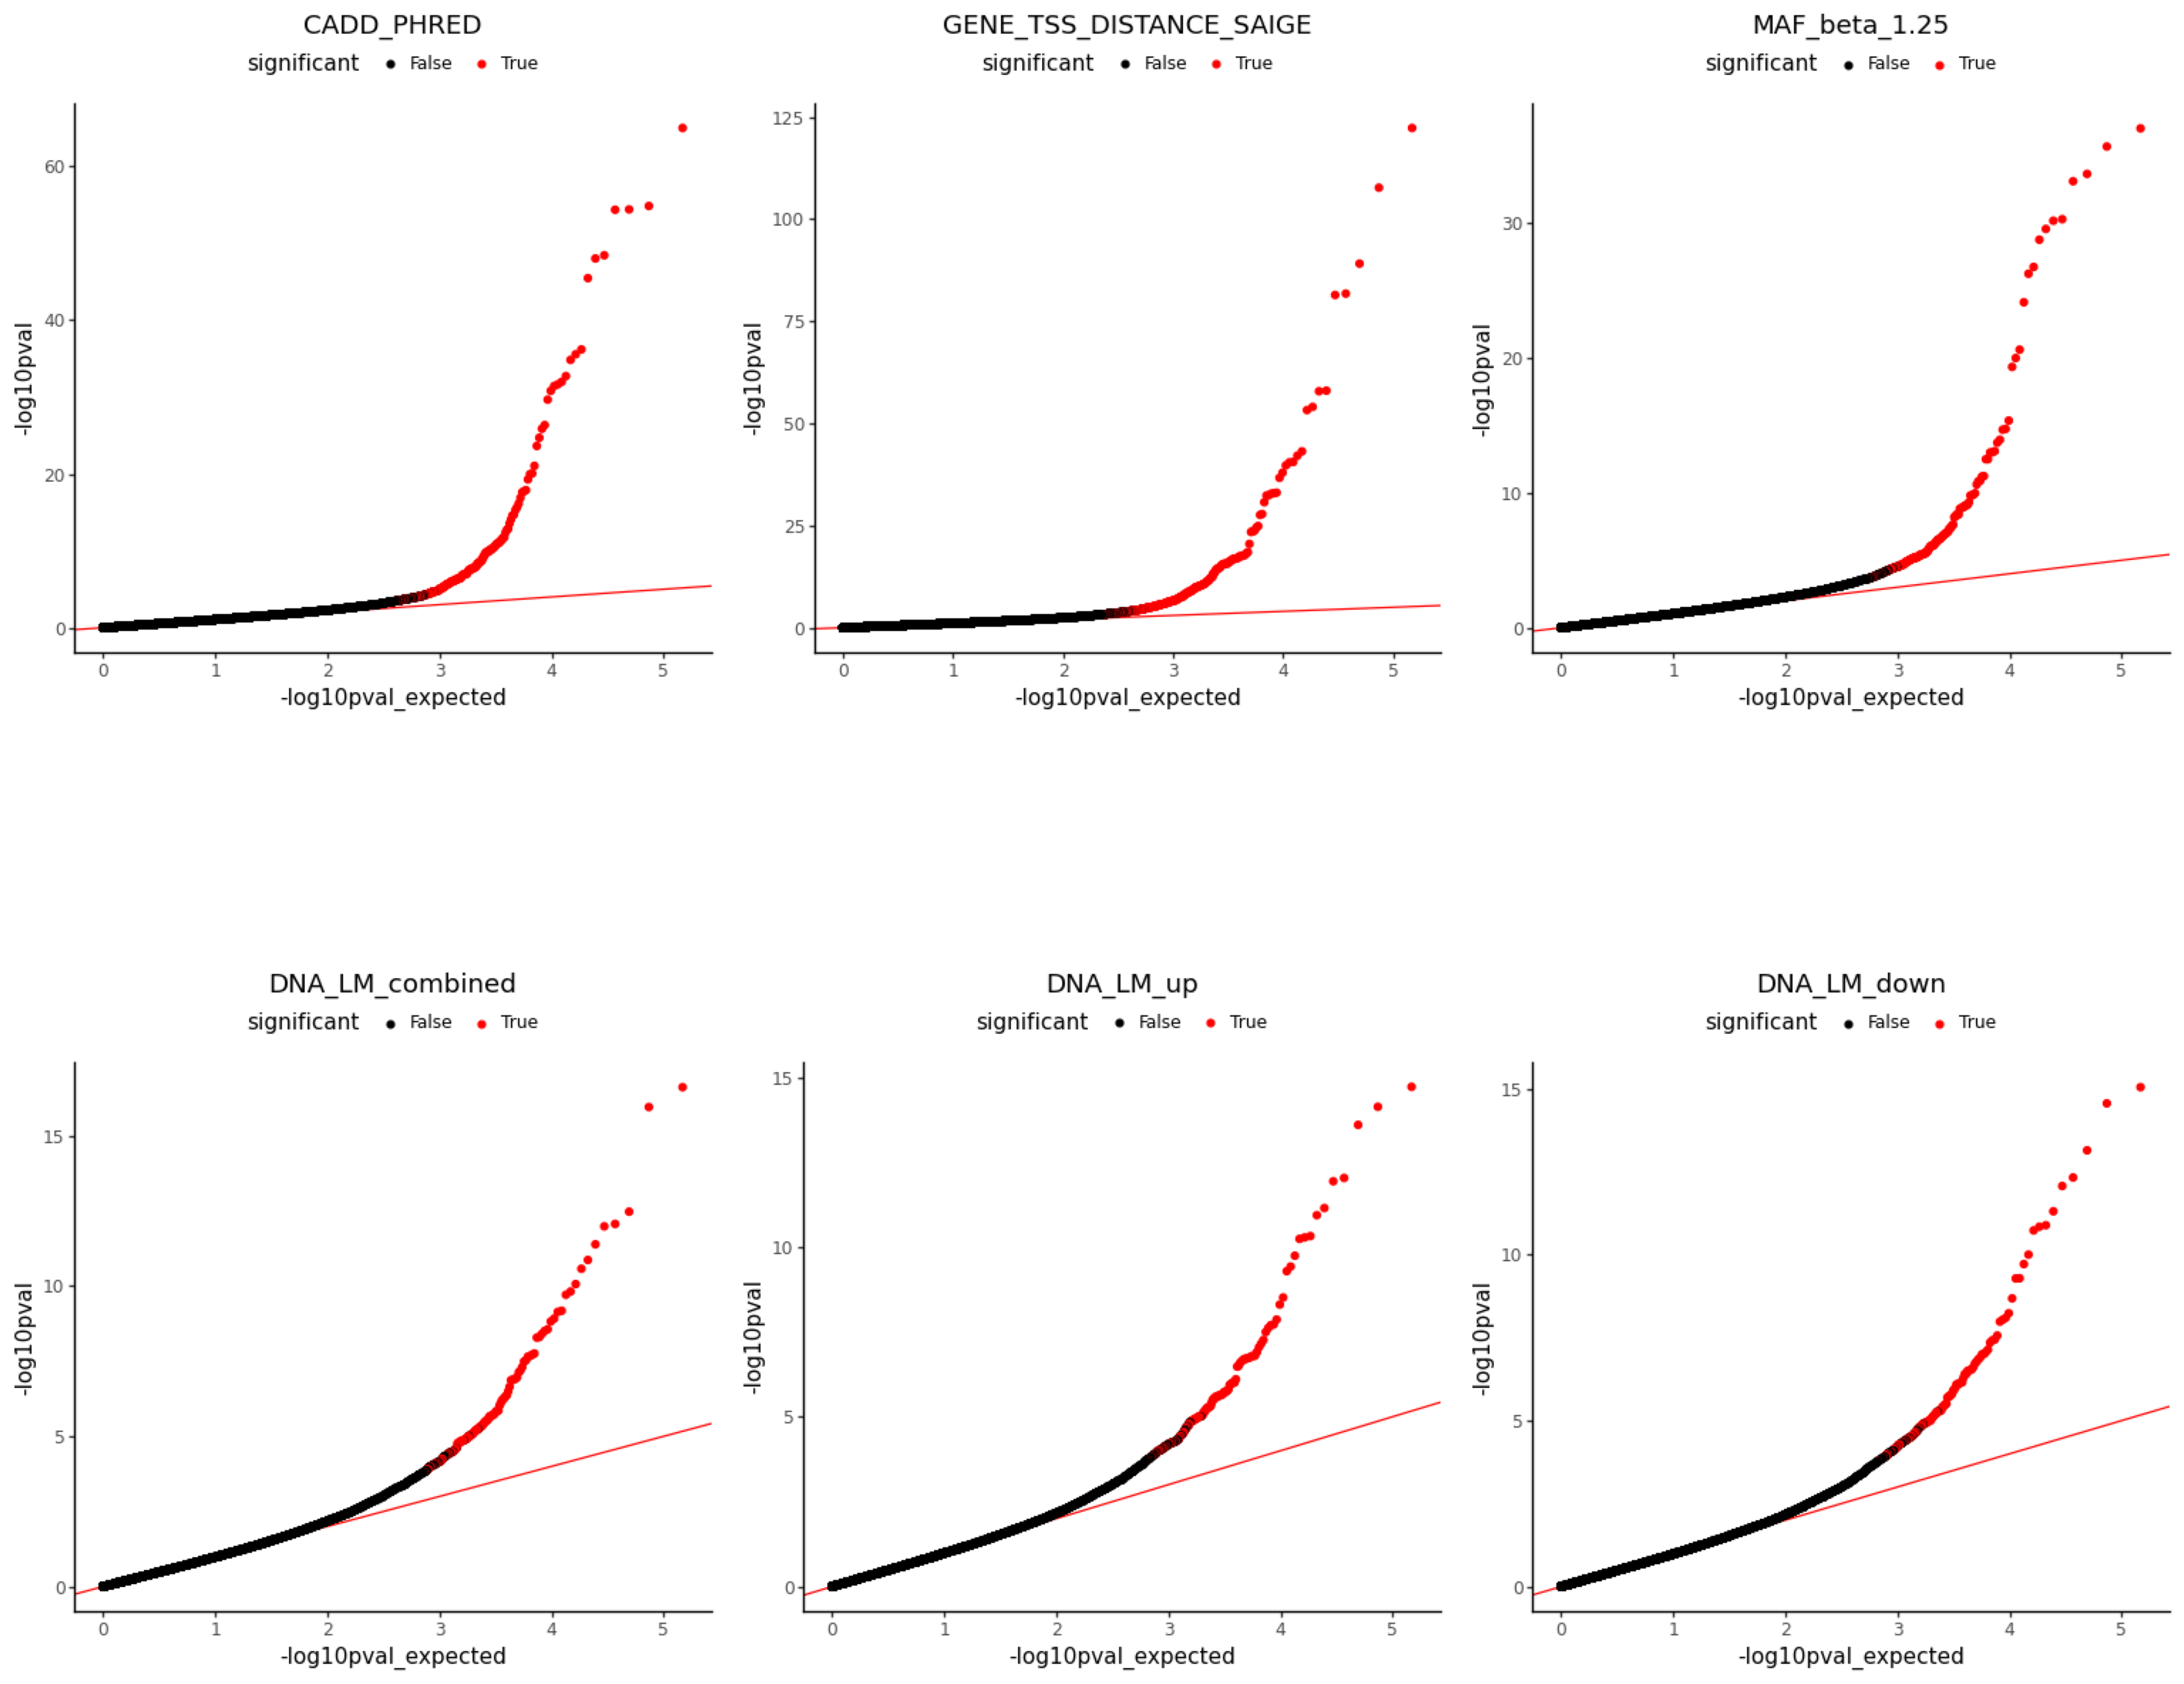

In [7]:
plotnine_grid2([p1,p2, p3, p4, p5, p6])

## Upset plots

In [8]:
significant_df = df_final_FDR[df_final_FDR["significant"]]

burden_dict = {}
for _, row in significant_df.iterrows():
    cell_type = row["cell_type"]
    burden_type = row["burden_type"]
    burden_gene = row["burden_gene"]

    # Initialize nested dictionaries if not present
    if cell_type not in burden_dict:
        burden_dict[cell_type] = {}
    if burden_type not in burden_dict[cell_type]:
        burden_dict[cell_type][burden_type] = []

    # Append burden gene
    burden_dict[cell_type][burden_type].append(burden_gene)

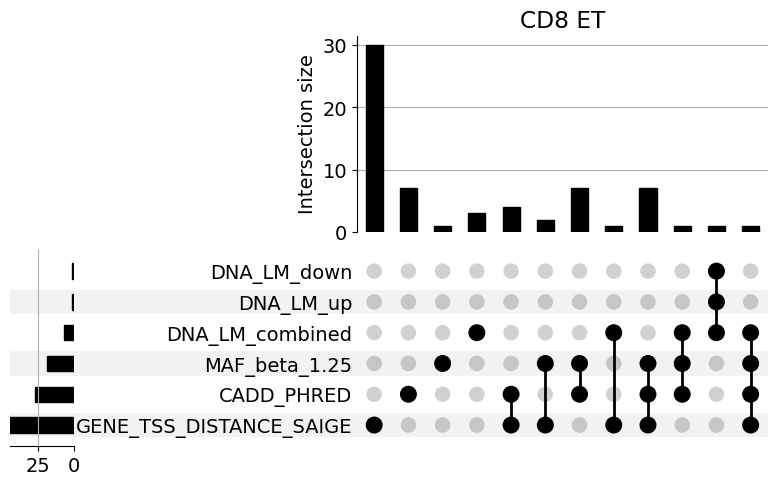

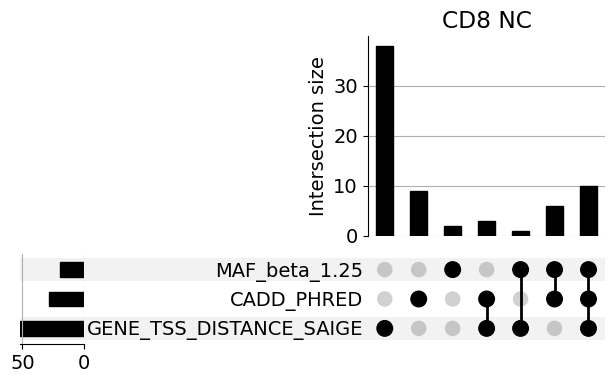

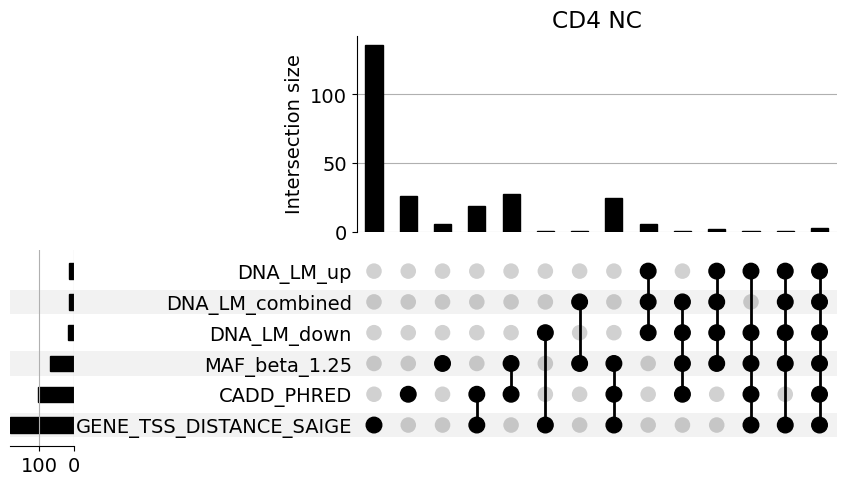

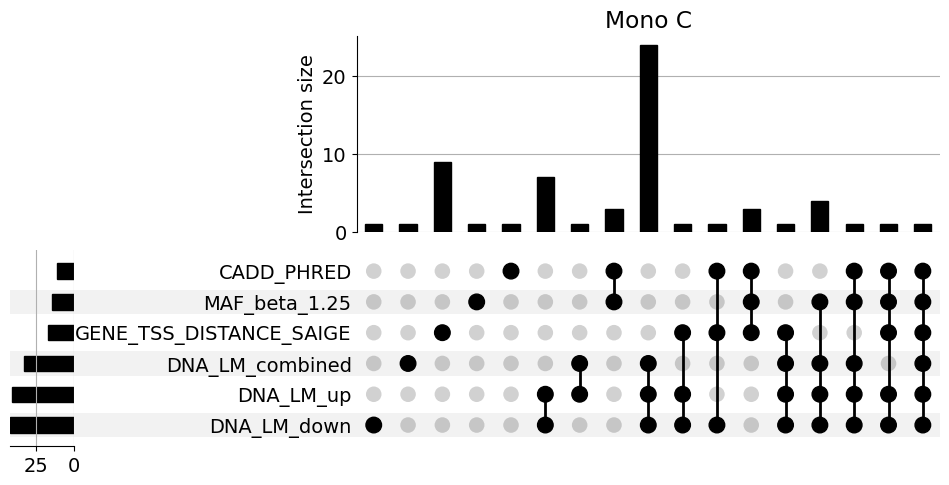

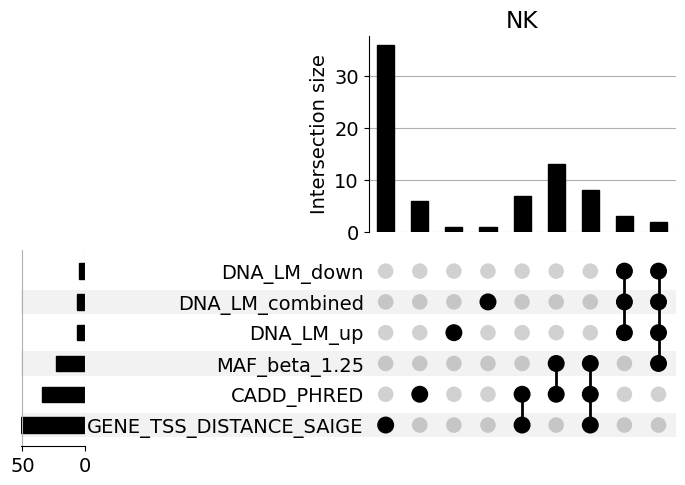

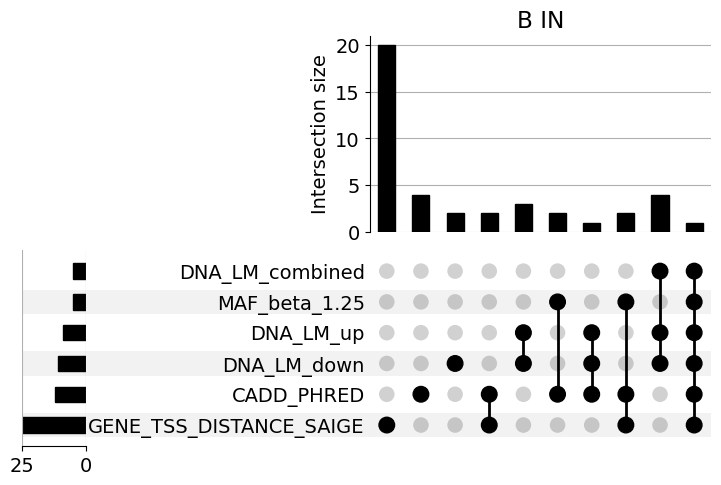

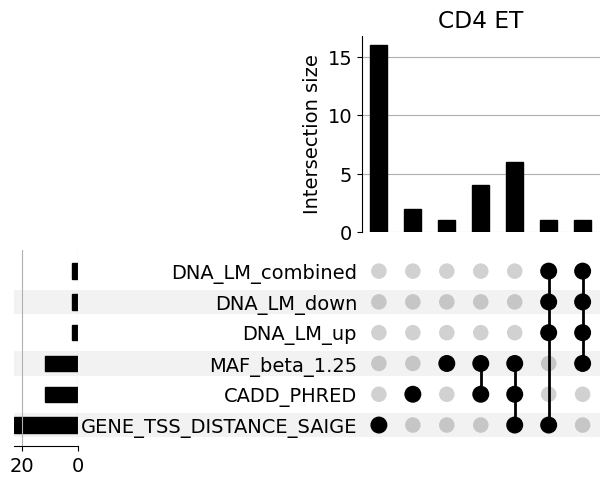

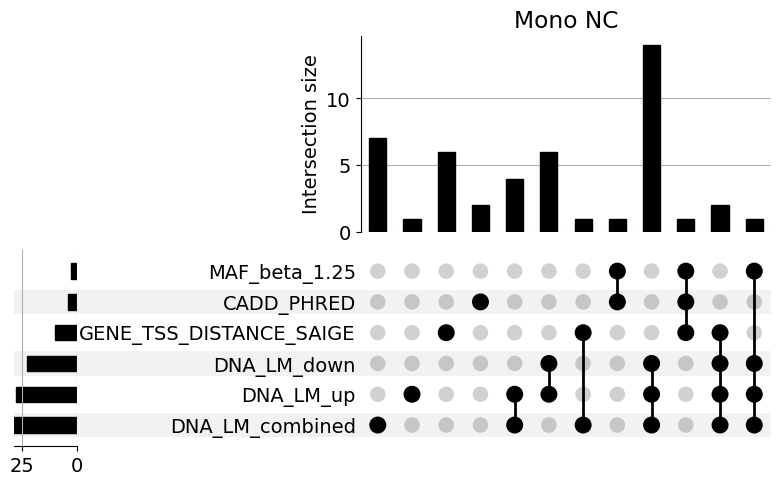

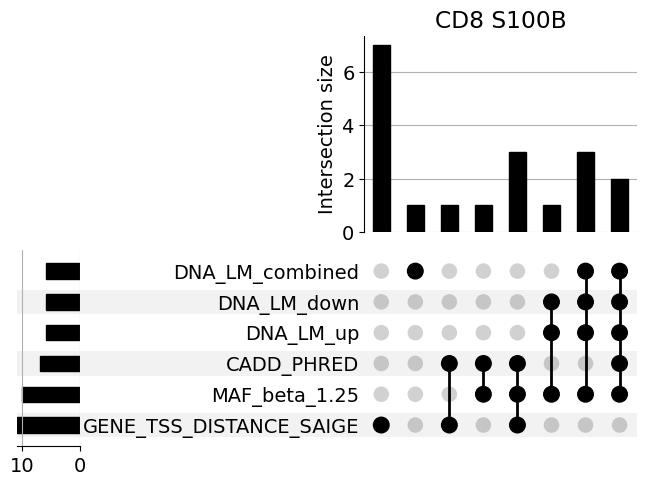

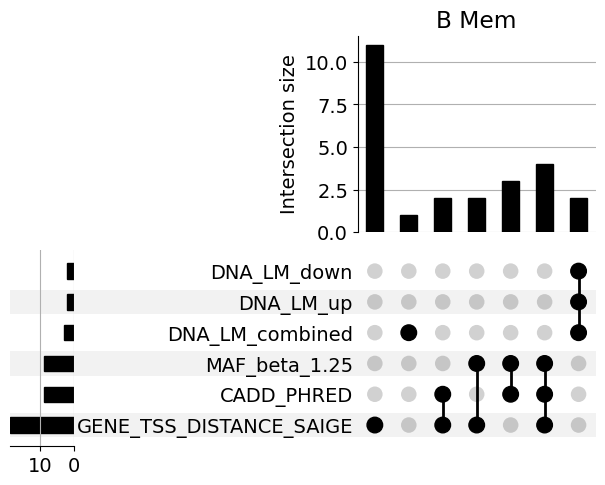

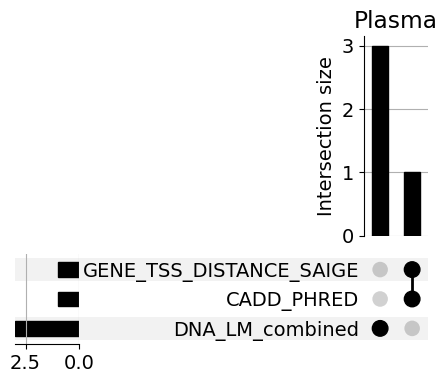

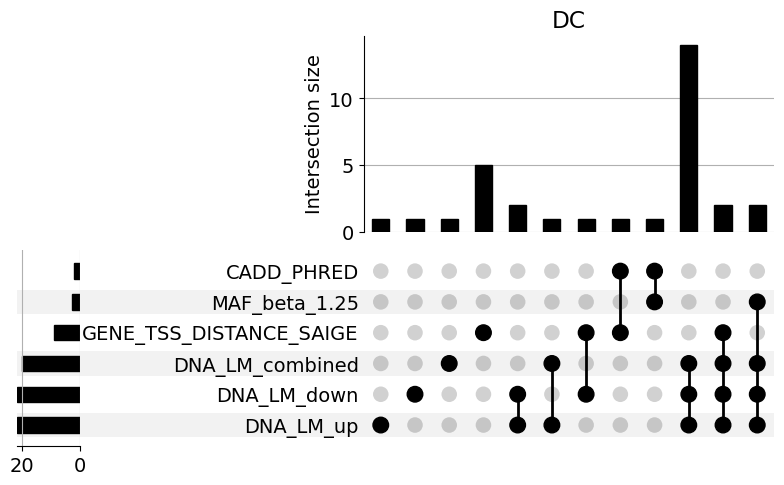

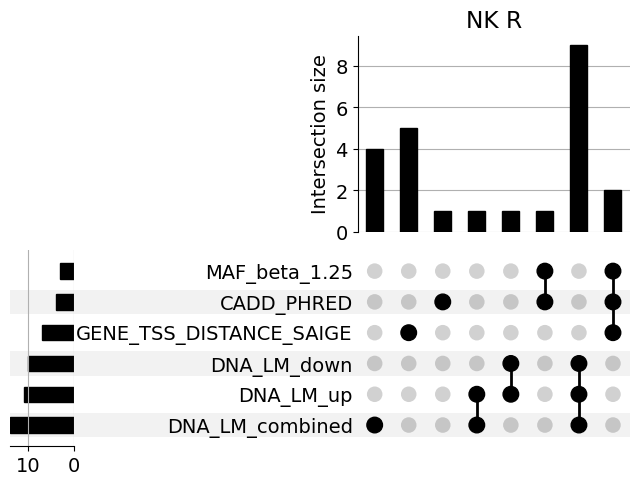

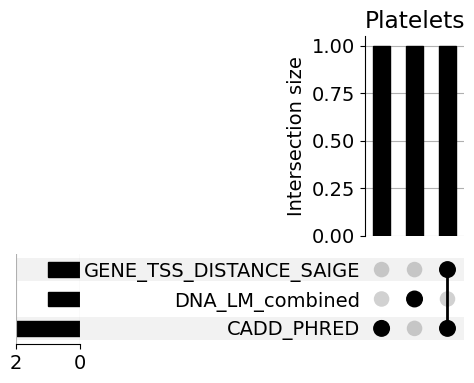

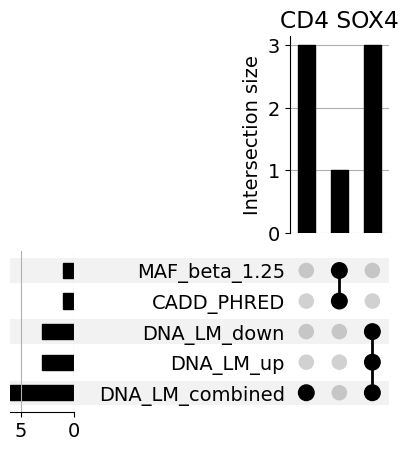

AttributeError: 'Index' object has no attribute 'levels'

In [9]:
for ct in burden_dict.keys():
    plot_upset(burden_dict[ct], ct, fontsize=14)


In [10]:
# all cell types
burden_dict_all = {}
for _, row in significant_df.iterrows():
    burden_type = row["burden_type"]
    burden_gene = row["burden_gene"]
    
    if burden_type not in burden_dict_all:
        burden_dict_all[burden_type] = []
    
    # Append burden gene
    burden_dict_all[burden_type].append(burden_gene)

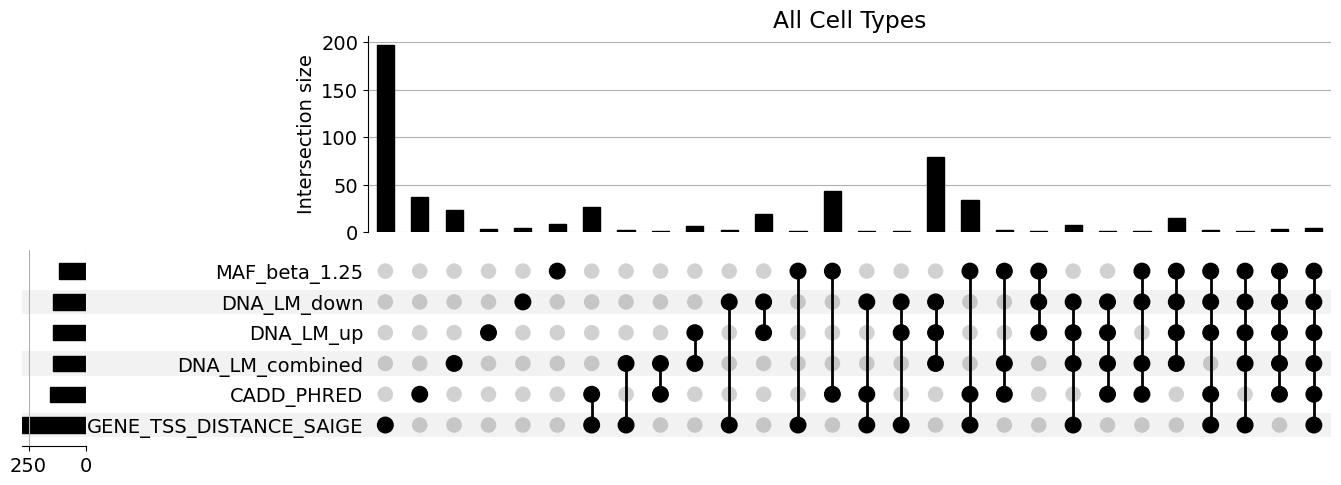

In [11]:
plot_upset(burden_dict_all, "All Cell Types", fontsize=14)

### Plot Beta Distribution

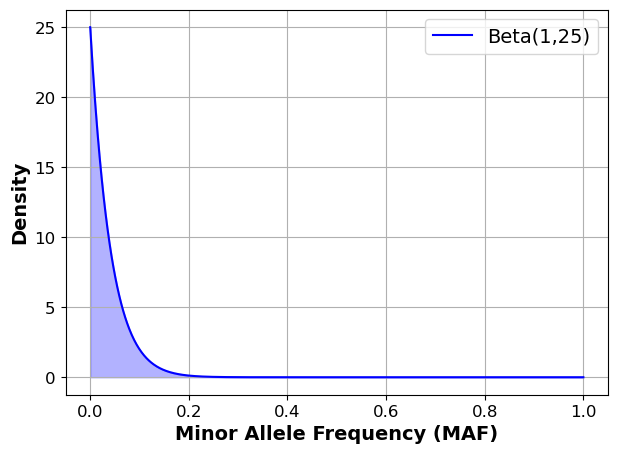

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define parameters for Beta(1,25)
alpha, beta_param = 1, 25

# Generate MAF values between 0 and 1
x = np.linspace(0, 1, 1000)

# Compute Beta PDF
y = beta.pdf(x, alpha, beta_param)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(x, y, label=r'Beta(1,25)', color='blue')
plt.fill_between(x, y, alpha=0.3, color='blue')  # Fill area under the curve
plt.xlabel("Minor Allele Frequency (MAF)", fontweight="bold", size=14)
plt.ylabel("Density", fontweight="bold", size=14)
#plt.title("Beta(1,25) Distribution of MAF for Variant Weighting")
plt.legend(fontsize=14)
plt.grid()

# Increase font size for axis scales
plt.tick_params(axis='both', labelsize=12)  # Adjust the label size as needed

plt.show()


In [17]:
filtered_results = df_final_FDR[df_final_FDR['significant']]

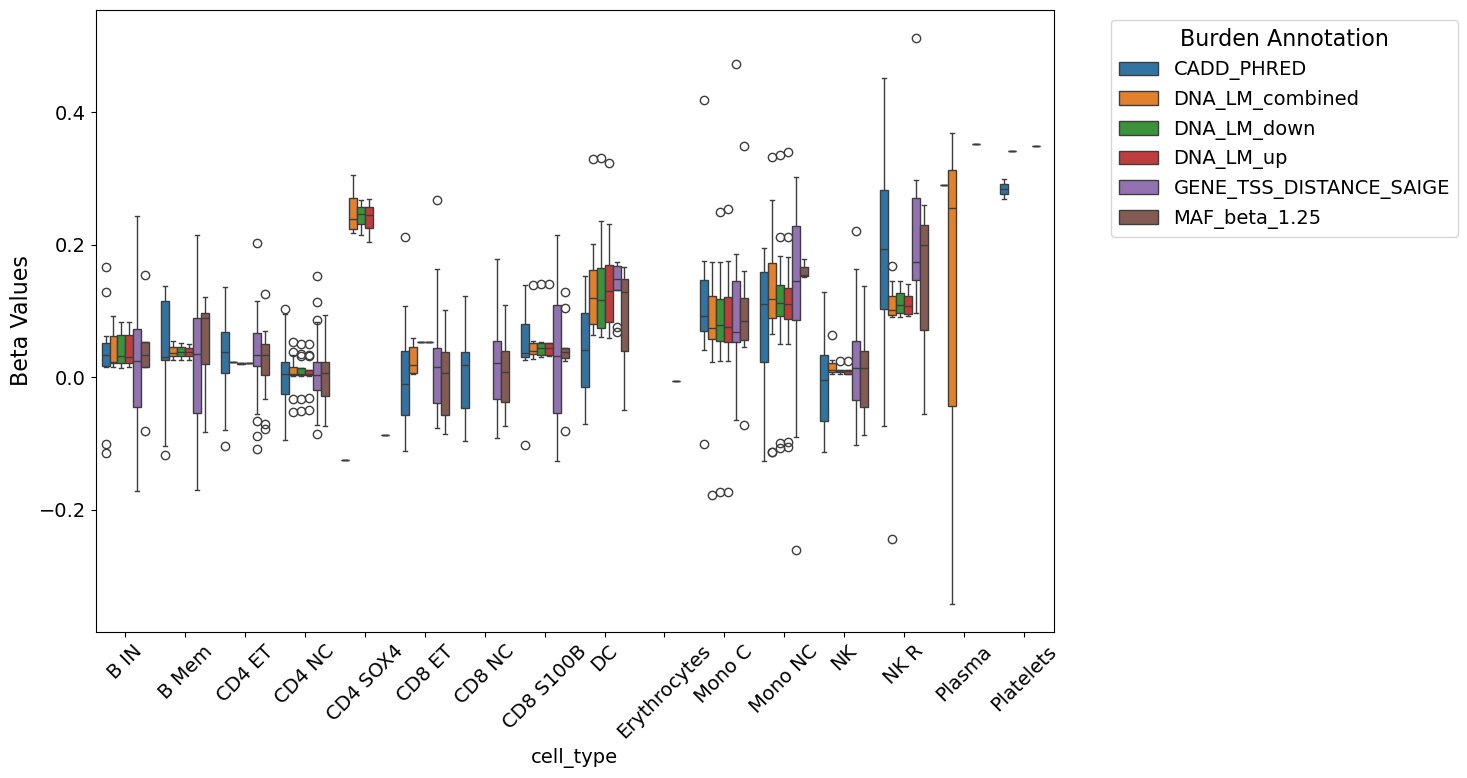

In [21]:
grouped_boxplot(filtered_results)

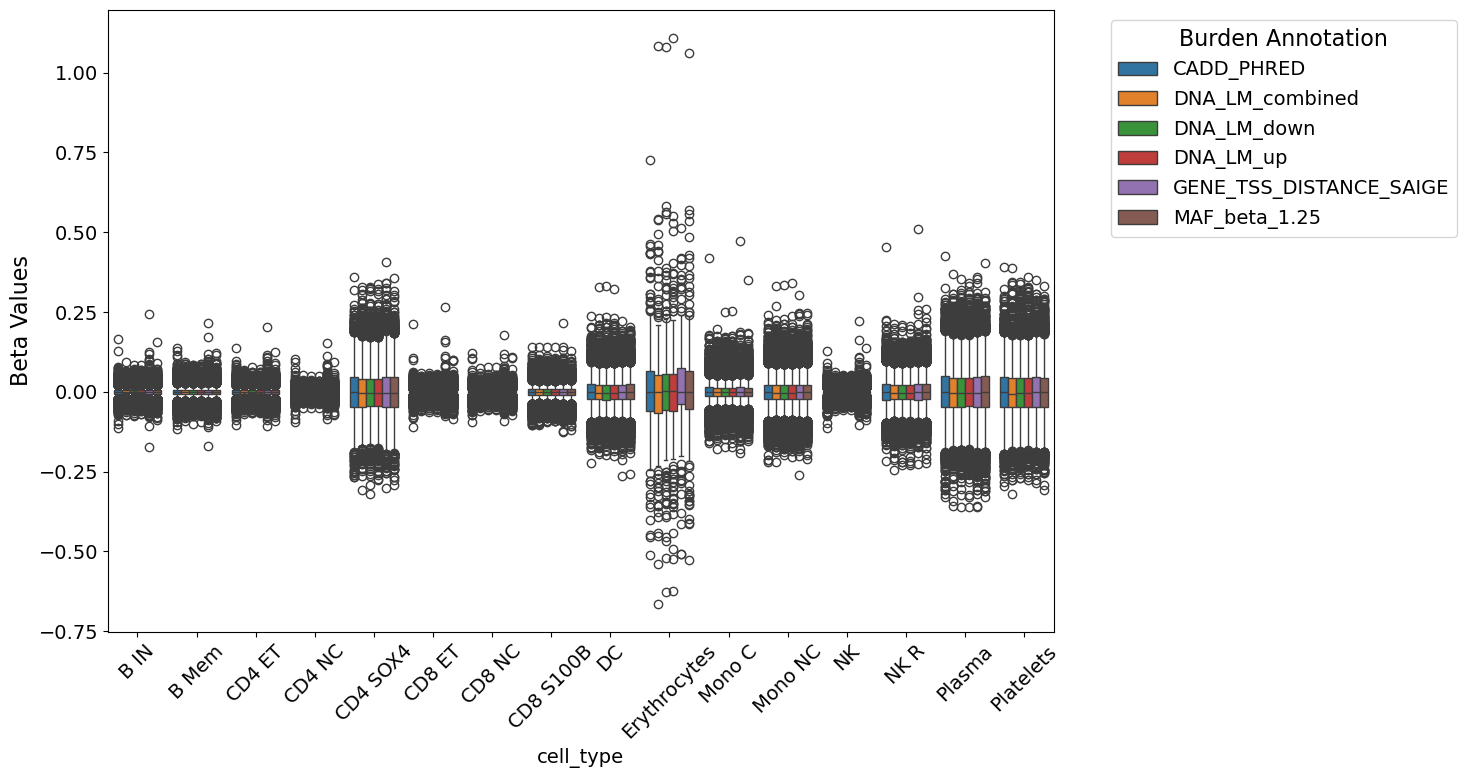

In [22]:
grouped_boxplot(df_final_FDR)

In [23]:
calc_sd = calculate_std(filtered_results)

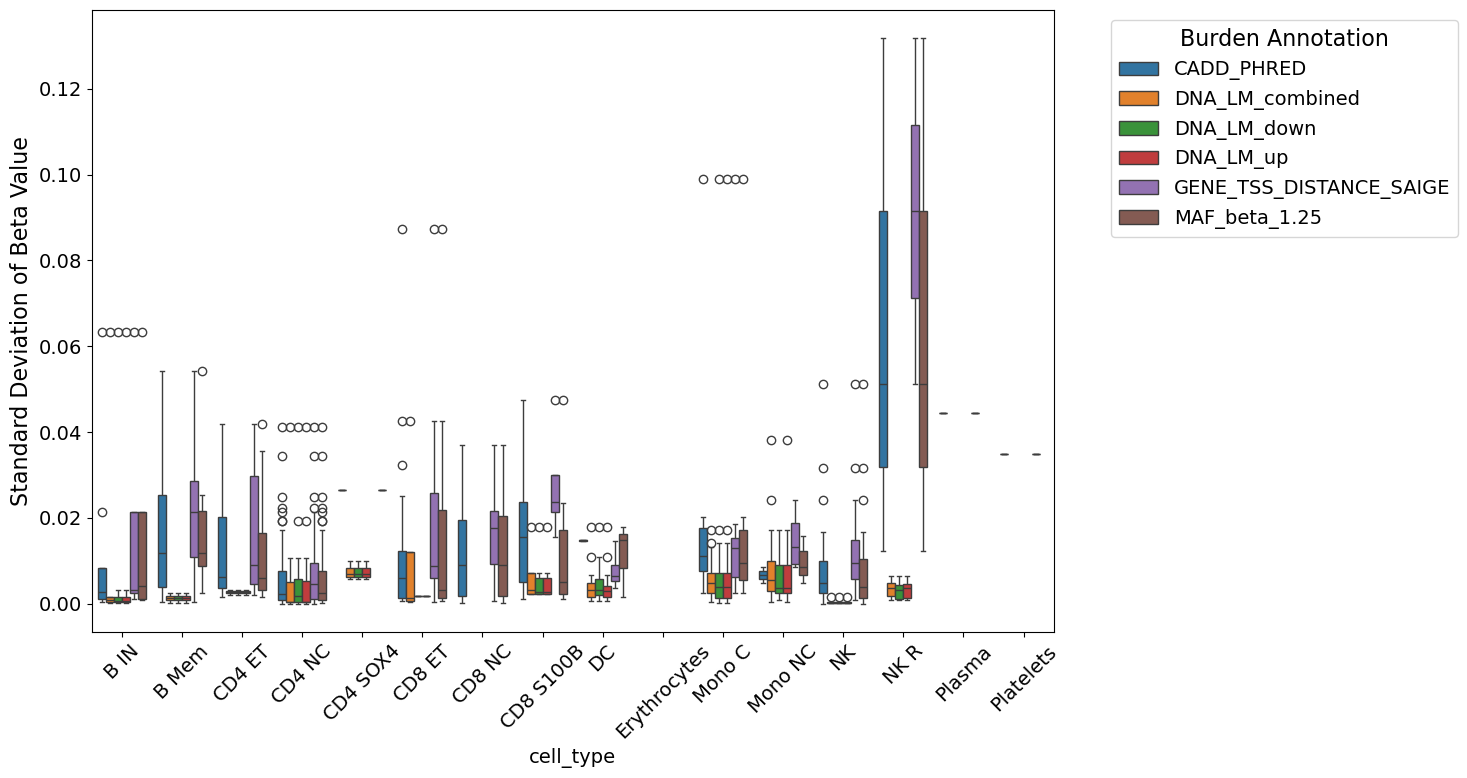

In [31]:
grouped_boxplot_sd(calc_sd)